In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

In [39]:
# 従来方法の評価対象logの読み込み
eval_list = ["eval5", "eval7", "eval12", "eval13", "eval16"]
model_list = ["v" + str(i) for i in range(1, 21)]
conventional_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../conventional/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    conventional_accs.append(accs)

In [40]:
avg_accs = np.zeros(20)
for i in range(5):
    avg_accs += np.array(conventional_accs[i])
avg_accs = avg_accs / 5

In [41]:
# 提案方法の評価対象logの読み込み
eval_list = ["eval29"]
model_list = ["v" + str(i) for i in range(1, 21)]
proposal_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    proposal_accs.append(accs)

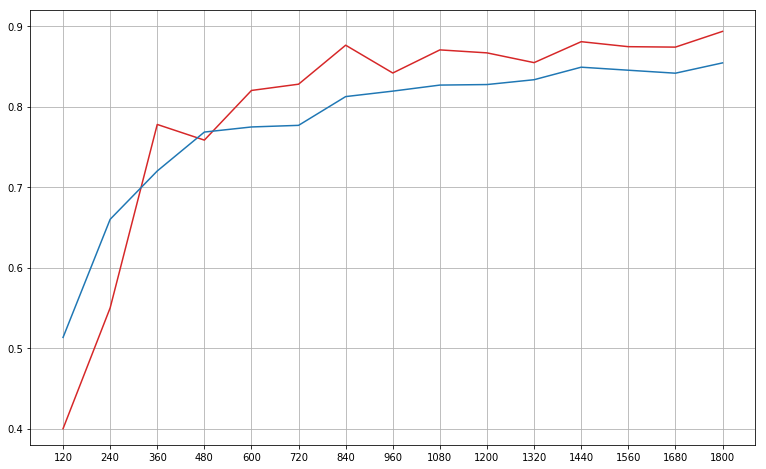

In [44]:
# 提案方法と従来方法の精度の平均値の比較
xlist = list(range(1, 16))

fig1 = plt.figure(figsize=(13,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*15+1, 120)))
plt.plot(xlist, proposal_accs[0][:15], color="tab:red")
plt.plot(xlist, avg_accs[:15], color="tab:blue")
plt.grid(True)